In [41]:
# Q 1: Join all sport-related tables to produce one dataframe that has all athletes values. 
# The final table should only have the same 5 columns: ID, time,power,RR, vo2, power.
# Write this dataframe to an excel file.

# import pandas library as pd
import pandas as pd

# import warnings library and suppress user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np

# read the first sheet in the excel
Kayaking = pd.read_excel('V02Max_Combined.xlsx','Kayaking')
# read the second sheet in the excel
Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')
# read the third sheet in the excel
Triathlon = pd.read_excel('V02Max_Combined.xlsx','Triathlon')
# read the fourth sheet in the excel
Fencing = pd.read_excel('V02Max_Combined.xlsx','Fencing')

# Create an empty dataframe
dataframes = []

# Load the data from the different Dataframes into the empty dataframe
dataframes.append(Kayaking)
dataframes.append(Triathlon)
dataframes.append(Fencing)

# Merge the dataframes
merged_df = pd.concat(dataframes)

# Export the merged dataframes into a common excel sheet
merged_df.to_excel('Merged_Data_Laxmi.xlsx', index=False)


In [3]:
print(merged_df)

       ID     time     RR       VO2  power
0      11 -168.600  727.0  0.287147      0
1      11 -167.872  728.0  0.287147      0
2      11 -167.148  724.0  0.287147      0
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[52062 rows x 5 columns]


In [43]:
# Q 2: Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

merged_df['Grade'] = np.select(
    [merged_df['time'] < 0,
     merged_df['time'] >= 0],
     ['Warm Up','GET'],
     np.nan
)

print(merged_df)

merged_df.to_excel('Merged_Data_Laxmi_With_Label.xlsx',index=False)
print(merged_df)

       ID     time     RR       VO2  power    Grade
0      11 -168.600  727.0  0.287147      0  Warm Up
1      11 -167.872  728.0  0.287147      0  Warm Up
2      11 -167.148  724.0  0.287147      0  Warm Up
3      11 -166.484  664.0  0.320580      0  Warm Up
4      11 -165.836  648.0  0.320580      0  Warm Up
...    ..      ...    ...       ...    ...      ...
27598  10  942.700  428.0  0.786363      0      GET
27599  10  943.124  424.0  0.786363      0      GET
27600  10  943.552  428.0  0.786363      0      GET
27601  10  943.976  424.0  0.786363      0      GET
27602  10  944.404  428.0  0.786363      0      GET

[52062 rows x 6 columns]
       ID     time     RR       VO2  power    Grade
0      11 -168.600  727.0  0.287147      0  Warm Up
1      11 -167.872  728.0  0.287147      0  Warm Up
2      11 -167.148  724.0  0.287147      0  Warm Up
3      11 -166.484  664.0  0.320580      0  Warm Up
4      11 -165.836  648.0  0.320580      0  Warm Up
...    ..      ...    ...       ...   

In [45]:
# Q49 : Retrieve the row with minimum IBI for fencing athletes using sorting technique.
# What is IBI : interbeat intervals (IBI) also known as RR-intervals.
import pandas as pd

# import warnings library and suppress user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

#Getting the number of records in the fencing sheet with values in the RR columns.
Fencing = pd.read_excel('V02Max_Combined.xlsx','Fencing')
Fencing.rename(columns={'RR': 'IBI'}, inplace=True)

def bubbleSort(arr):   
    arr_len = len(arr)
    # Outer For loop to traverse through all elements in the RR Column list
    for i in range(arr_len):
        # Inner For Loop to traverse through the remaining unsorted elements in the RR Column list
        for j in range(0, arr_len - i - 1):
            # Range of the arrayarr_len is from 0 to n-i-1
            # Swap the elements if the element found 
            #is greater than the adjacent element
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                
# Get all the values of the RR Column in a list
RR_Interval_List = Fencing['IBI'].tolist()
bubbleSort(RR_Interval_List)

df_new = Fencing[ (Fencing['IBI'] == RR_Interval_List[0]) ]
print('Row with minimum IBI for fencing athletes using Bubble Sort is:')
print(df_new)

Row with minimum IBI for fencing athletes using Bubble Sort is:
       ID     time  IBI       VO2  power
19582   7  596.372  252  1.293014    155


<Axes: xlabel='ID', ylabel='VO2'>

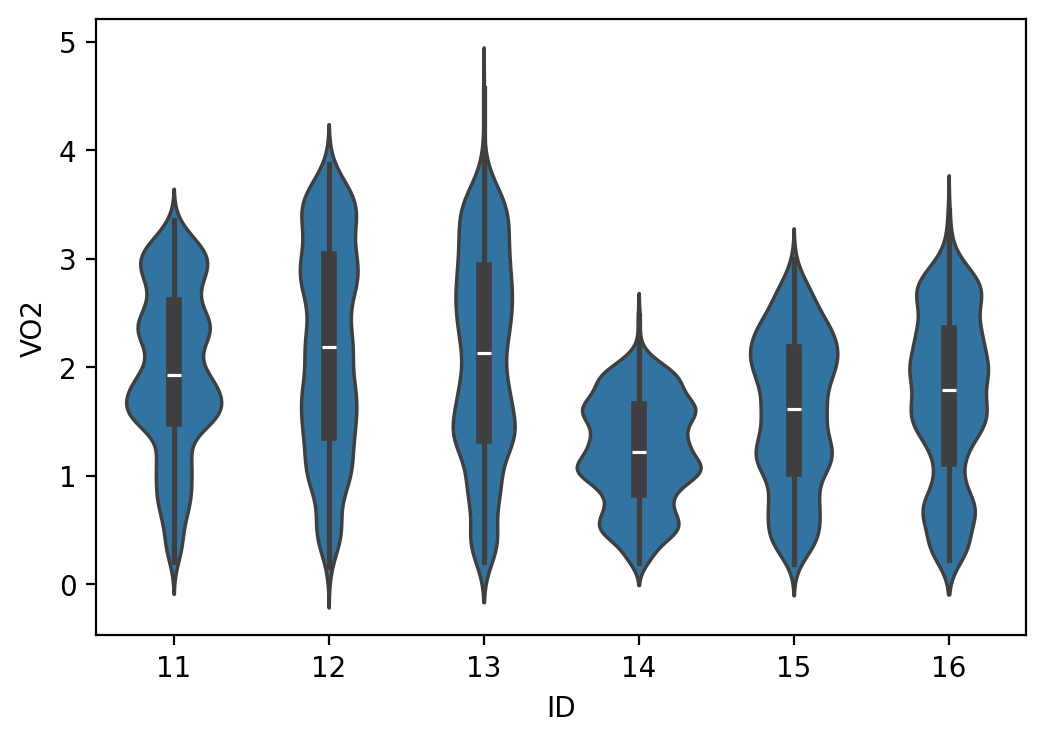

In [103]:
# Q.50: Create a violin chart using any 2 columns in the dataset
# A violin plot is a statistical representation of numerical data
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_excel('V02Max_Combined.xlsx')
# Defines how the violinplot would look like
plt.figure(figsize=(6,4), dpi=200)
# Create the violinplot using Columns ID & VO2
sns.violinplot(data=df, x='ID', y='VO2')

In [109]:
# Q.51: List every athlete’s V02 ml/kg

# The amount of oxygen consumed in the same second recorded above. 
# Personal V02 per person, is the sum total of all V02 recorded for that athlete divided by body weight to arrive at V02 max in ml per kg of body weight

import pandas as pd

# Suppress UserWarning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



# Read all the rows from Athletes worksheet in V02Max_Combined.xlsx
Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')

# Read all the rows from excel sheet Merged_Data_Laxmi_With_Label.xlsx
AllSportsData = pd.read_excel('Merged_Data_Laxmi_With_Label.xlsx')

# Create an empty list to hold the values for VO2 max (ml/kg) for each athlete
Personal_V02_All_Athletes = []

# Loop to get the VO2 max (ml/kg) values for each athlete
for row in Athletes.itertuples(index=True, name='Pandas'):
    # Get the ID for each athlete
    Athlete_Id = getattr(row, "ID")
    # Get the ID for each athlete
    Athlete_Weight = getattr(row, "Weight")
    # Get the total VO2 for an athlete by adding all the VO2 values for the athlete
    VO2_Sum_Total = AllSportsData.loc[AllSportsData['ID'] == Athlete_Id, 'VO2'].sum()
    # Calculate the Personal VO2 for each athlete using the formula: all VO2 recorded for that athlete divided by body weight
    Personal_V02 = (VO2_Sum_Total/Athlete_Weight)
    # Add the calculated Personal VO2 value to the list created to hold the VO2 max (ml/kg) values for each athlete
    Personal_V02_All_Athletes.append(Personal_V02)

# Add the VO2 max (ml/kg) for each athlete to the Athletes DataFrame
Athletes["VO2 max (ml/kg)"] = Personal_V02_All_Athletes   
print(Athletes)

# Invoke the function to write the new Athletes DataFrame to the existing excel sheet V02Max_Combined.xlsx
write_excel('V02Max_Combined.xlsx','Athletes',Athletes)


    ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    

In [147]:
# Q.52: Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.
# Caleb Dixon is fittest athlete.
# VO2 max measures how much oxygen your body uses while exercising.
# It's a common tool to understand your fitness level. The more oxygen you inhale, the more energy your body can use. 
# Higher VO2 max usually means better physical fitness

Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')

# Let's find the fittest athlete
sorted_athletes=Athletes.sort_values(['VO2 max (ml/kg)'], ascending=[False])

# Get first row values of multiple columns
sorted_athletes[['First Name','Last Name','Height','sport','VO2 max (ml/kg)']]


,First Name,Last Name,Height,sport,VO2 max (ml/kg)
11,Caleb,Dixon,183,kayak,92.258212
12,Mia,Carpenter,183,kayak,90.758693
10,Isabella,Griffin,182,kayak,89.586903
4,Ava,Thompson,186,fencing,86.742579
17,Owen,Myers,158,triathlon,81.208775
3,Liam,Sanchez,180,fencing,76.989878
16,Lucas,Foster,156,triathlon,73.789806
5,Sophia,Rodriguez,169,fencing,71.679465
2,Jackson,Harper,191,fencing,69.705657
15,Logan,Anderson,182,kayak,69.661622


In [53]:
# Q.53: phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill
import collections

# Creating a dictionary called phonebook
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}

# Getting Jill's key from the dictonary.
Jill_Phone_No = phonebook.get('Jill')

# Print Jill's Phone Number.
print('Jill\'s phone number is -',Jill_Phone_No)

Jill's phone number is - 947662781


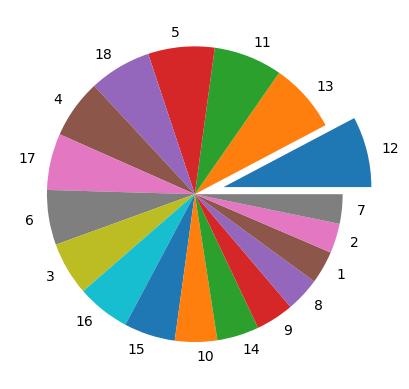

In [49]:
# Q.54: Create a Pie chart for Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID
import matplotlib.pyplot as plt
import numpy as np

# Read the excel sheet containing V02 kg/ml values created in Q.51
Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')

# Sort the DataFrame by Column V02 kg/ml in descending order
Athletes_Sort_Descending = Athletes.sort_values(by=['VO2 max (ml/kg)'], ascending=False)
# print(Athletes_Sort_Descending)

# Create the array of data values to be plotted, using the values in the V02 kg/ml column
y = np.array(Athletes_Sort_Descending['VO2 max (ml/kg)'])

# Create the label for the pie chart using an the IDs of the players
Athlete_Id = np.array(Athletes_Sort_Descending['ID'])

# Assign 0 values to all the data except the 1st row (0th index) which has the highest V02 kg/ml
# [0.1, 0, 0, 0......0]
explode = np.zeros(len(Athlete_Id))
explode[0] = 0.2

# Create the pie chart
plt.pie(y, labels=Athlete_Id, explode = explode)
plt.show()

In [37]:
# Q.55: Using a for loop iterate through HR for all triathletes and display all details of the athlete with the highest heart rate
# Heart Rate = 60/(RR/1000) will give you Heart rate per minute

# import pandas library as pd
import pandas as pd

# Read the Triathlon sheet and populate the new column for Heart Rate (HR)
Triathlon = pd.read_excel('V02Max_Combined.xlsx','Triathlon')
Triathlon['HR'] = 60/(Triathlon['RR']/1000)
# print(Triathlon)

# Create a list of HR values for the triathletes
List_HR_Values=Triathlon['HR'].values.tolist()
# print(List)

# Initially set the highest value for HR to the first record in the list
highest_HR = List_HR_Values[0]
# print("Starting Highest Value")
# print(highest_HR)

# Iterate through the list of HR values and find the record with the highest heart rate.
for HR_Val in range(0,len(List_HR_Values)):
    # print(List[HR_Val])
    if highest_HR < List_HR_Values[HR_Val]:
        highest_HR = List_HR_Values[HR_Val]
        row_number = HR_Val # Save the row number corresponding to the highest HR Value.
    
print(f"Highest Value:{highest_HR}")
print("Row Number of Highest Value:")
print(row_number)

# Read the Athletes sheet 
Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')

# Find the Athlete Id in the Triathlon List in the row corresponding to the highest HR Value. 
Athlete_Id=Triathlon['ID'].iloc[row_number]

# Find the record for the Athlete from the Athlete DataFrame corresponding to the above Athlete_Id
df=Athletes[(Athletes['ID'] == Athlete_Id)]
print("Record of athlete with the highest Heart Rate")
print(df)

Highest Value:197.3684210526316
Row Number of Highest Value:
4152
Record of athlete with the highest Heart Rate
    ID  age  Weight  Height  P_vt1  P_vt2      sport Gender Ethnicity  \
17  18   12    39.7     158     65    168  triathlon   Male    Latino   

   First Name Last Name  VO2 max (ml/kg)  
17       Owen     Myers        81.208775  


       sport  counts
0    fencing      10
1      kayak       6
2  triathlon       2


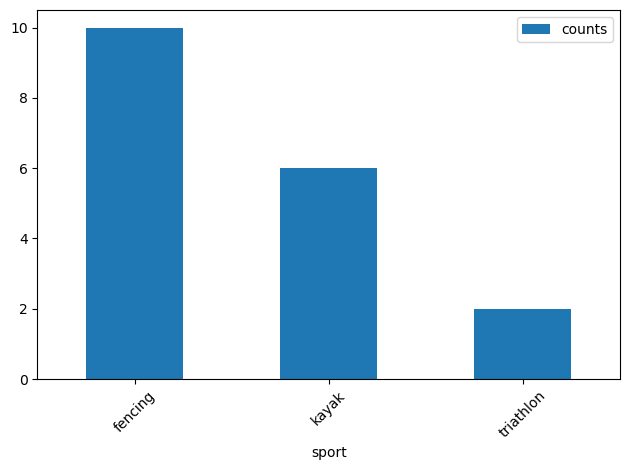

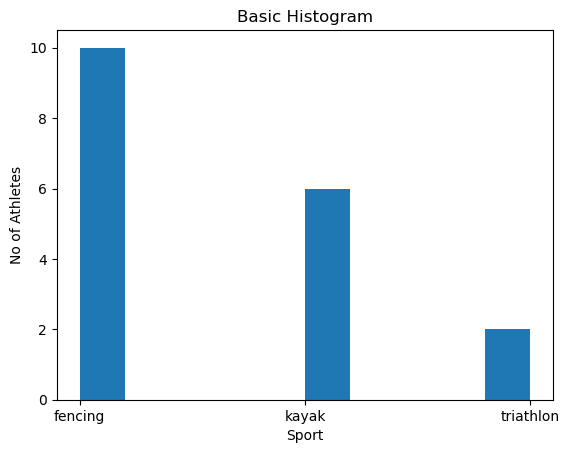

In [67]:
# Q.56: Display a histogram to show distribution of athletes by sport.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Generate  data for the histogram
Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')
value_counts=Athletes['sport'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['sport', 'counts'] # change column names
print(df_value_counts_reset)
df_value_counts_reset.set_index('sport').plot.bar(rot=45)
plt.tight_layout()
plt.show()

# sns.histplot(data=df_value_counts_reset, x='Counts', y='Sports')

# Plotting a basic histogram
plt.hist(Athletes['sport'])
 
# Adding labels and title
plt.xlabel('Sport')
plt.ylabel('No of Athletes')
plt.title('Basic Histogram')
 
# # Display the plot
plt.show()

In [71]:
# Q.57:get the first letter of last name of students using for loops and RegEX
import re
# read dataframe
Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')
LastName = Athletes['Last Name'].tolist()
for part in LastName:
    print(part)
    # get the initial
    initial = re.findall(r'\b\w', part)
    print(initial)

Martinez
['M']
Reynolds
['R']
Harper
['H']
Sanchez
['S']
Thompson
['T']
Rodriguez
['R']
Simmons
['S']
Bennett
['B']
Price
['P']
Jordan
['J']
Griffin
['G']
Dixon
['D']
Carpenter
['C']
Mitchell
['M']
Wallace
['W']
Anderson
['A']
Foster
['F']
Myers
['M']


In [145]:
# Q.58: What is the average % difference in heart rate between warm up and GET for all athletes?

Athletes = pd.read_excel('Merged_Data_Laxmi_With_Label.xlsx')


# Calculate Heart Rate per minute

Athletes['HR'] = 60 / (Athletes['RR'] / 1000)

HR_warm_up_data = Athletes[Athletes['Grade']=='Warm Up']
HR_GET_data = Athletes[Athletes['Grade']=='GET']

# Calculate the average HR for Grade_warmup & Grade_GET
average_HR_warm_up = HR_warm_up_data['HR'].mean()
average_HR_GET = HR_GET_data['HR'].mean()


#Find the average % difference in HR
percentage_differnce = ((average_HR_GET - average_HR_warm_up)/average_HR_warm_up )*100
print(f"The percentage_differnce in heart rate between warm-up and GET for all athletes is {percentage_differnce:.2f}%")



The percentage_differnce in heart rate between warm-up and GET for all athletes is 86.06%


In [113]:
# Q.59: Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?
Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')


# Let's find the tallest athelete
sorted_athletes=Athletes.sort_values(['Height'], ascending=[False])

# Get first row values of multiple column
sorted_athletes[['First Name','Last Name','Height','sport','VO2 max (ml/kg)']]

First Name           Jackson
Last Name             Harper
Height                   191
sport                fencing
VO2 max (ml/kg)    69.705657
Name: 2, dtype: object

In [87]:
# Q.60: get the last letter      of athletes last names using RegEX
import re
import pandas as pd
# read dataframe
Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')

# list all the last name
LastName = Athletes['Last Name'].tolist()
# print(LastName)

# select last letter from last name
for part in LastName:
    print(part)
    # get the initial
    # initial = re.findall(r'[regular expression]', part)
    # ^ - start of a string
    # $ - end of a string
    LastName = re.findall(r'[A-Za-z]$', part)
    print(LastName)


Martinez
['z']
Reynolds
['s']
Harper
['r']
Sanchez
['z']
Thompson
['n']
Rodriguez
['z']
Simmons
['s']
Bennett
['t']
Price
['e']
Jordan
['n']
Griffin
['n']
Dixon
['n']
Carpenter
['r']
Mitchell
['l']
Wallace
['e']
Anderson
['n']
Foster
['r']
Myers
['s']


In [99]:
# Q.61: Reverse an arrays order in Python. You can use any array with any values you like.

import numpy as np

Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')
Weight = Athletes['Weight'].tolist()
Weight.reverse()
print(Weight)  


[39.7, 39.9, 70.4, 63.5, 62.3, 83.9, 86.0, 84.8, 58.8, 57.1, 51.2, 49.8, 65.6, 76.4, 76.5, 89.9, 56.2, 53.7]


In [127]:
# Q.62: What is the root mean of successive differences for 30 consecutive minutes for each athlete.
# Find the root mean square for 30 consecutive HRV for each athlete
# Heart rate per minute = 60/(RR/1000)

warnings.filterwarnings("ignore", category=DeprecationWarning)

Athletes = pd.read_excel('Merged_Data_Laxmi_With_Label.xlsx')

# Calculate Heart Rate per minute
# Heart Rate (HR) = 60 / (RR / 1000)
Athletes['HR'] = 60 / (Athletes['RR'] / 1000)
def calculate_rmsd(Athletes):
    Athletes = Athletes.set_index('time')  
# Calculate successive differences    
    Athletes['diff'] = Athletes['HR'].diff().dropna() 
# Calculate Root Mean of Successive Differences(RMSD)  
    rmsd = np.sqrt((Athletes['diff'] ** 2).mean())  
    return rmsd
# Calculate RMSD for each athlete
rmsd = Athletes.groupby('ID').apply(calculate_rmsd).reset_index()
rmsd.columns = ['ID', 'RMSD']
print("Root Mean of Successive Differences for Each Athlete:")
print(rmsd)

Root Mean of Successive Differences for Each Athlete:
    ID      RMSD
0    1  3.864135
1    2  3.714729
2    3  2.339284
3    4  5.397358
4    5  3.503996
5    6  5.221062
6    7  4.992302
7    8  7.496826
8    9  3.158264
9   10  3.113656
10  11  2.226485
11  12  2.780271
12  13  2.372062
13  14  4.971592
14  15  4.314640
15  16  4.371606
16  17  4.252705
17  18  3.635733


In [101]:
# Q.63: On average how many minutes did each athlete in the sport of fencing spend in Zone 5?
# Zone 5 (anaerobic) 155+ HR max and above
# 60/(RR/1000) will give you Heart rate per minute
import pandas as pd

# Suppress UserWarning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Read all the rows from Athletes worksheet in V02Max_Combined.xlsx
Athletes = pd.read_excel('V02Max_Combined.xlsx','Fencing')
# Sort the datafeed by athlete id in ascending order so that records for all athletes is in a continuous order
Athletes.sort_values(by="ID")
# print(Athletes)

# Create a variable to hold the total time in Zone 5 for each athlete and assign it to 0
TotalTime = 0
# Create a variable to hold the id value for each row and assign it to -1
Initial_Id_Value = -1
# Create a counter to skip comparison for the first row.
i = 0
# Create a counter to hold the number of times HR value for each athlete is greater than 155.
ctr=0

# Loop to get the Heart rate per minute values for each athlete
for row in Athletes.itertuples(index=True, name='Pandas'):
    # Get the RR for each row
    RR_Value = getattr(row, "RR")
    # Calculate the Heart rate per minute for each row using the formula: 60/(RR/1000)
    if (RR_Value > 0):
        HR_PM_Value = 60/(RR_Value/1000)
    # Get the ID for each row
    Id_Value = getattr(row, "ID")
    
    # Print the total time spent by an athlete in Zone 5 when all the records for that athlete have been read.
    # Logic: Compare the current ID with the ID for the previous row. If they do not match we have finished reading the records for that ID.
    # Logic: Print the total minutes each athlete in the sport of fencing spends in Zone 5.
    # Logic: Do not check for the first row since we do not have any previous rows to compare.
    if (Id_Value != Initial_Id_Value and i > 0):
        if (TotalTime > 0):
            # print(ctr)
            print('Athlete Id -',Initial_Id_Value,'average time (in minutes)',(TotalTime/ctr),'in Zone 5')            
            # Re-initialize the total time variable for the next athlete
            TotalTime = 0
            # Re-initialize the counter variable for the next athlete
            ctr = 0
        else:
            print('Athlete Id - ',Initial_Id_Value,' did not spend any time in Zone 5')
            # Re-initialize the total time variable for the next athlete
            TotalTime = 0
            # Re-initialize the counter variable for the next athlete
            ctr = 0

    # If Heart Rate Per Minute is greater than 155 add the time for the athlete
    if (HR_PM_Value > 155):
        Time_Value = getattr(row,"time")
        TotalTime += Time_Value
        ctr += 1

    # Get the ID for each row
    Initial_Id_Value = getattr(row, "ID")

    # Increment the counter by 1
    i = 1   

# print(ctr)
print('Athlete Id -',Initial_Id_Value,'average time (in minutes)',(TotalTime/ctr),'in Zone 5')

Athlete Id - 1 average time (in minutes) 525.9586761453396 in Zone 5
Athlete Id - 2 average time (in minutes) 405.58240192539125 in Zone 5
Athlete Id - 3 average time (in minutes) 1022.5321100917427 in Zone 5
Athlete Id - 4 average time (in minutes) 1040.7045919282511 in Zone 5
Athlete Id - 5 average time (in minutes) 885.49140226818 in Zone 5
Athlete Id - 6 average time (in minutes) 788.2783155555566 in Zone 5
Athlete Id - 7 average time (in minutes) 500.6877739331018 in Zone 5
Athlete Id - 8 average time (in minutes) 545.8414924554185 in Zone 5
Athlete Id - 9 average time (in minutes) 517.4646822916674 in Zone 5
Athlete Id - 10 average time (in minutes) 637.0108442503633 in Zone 5


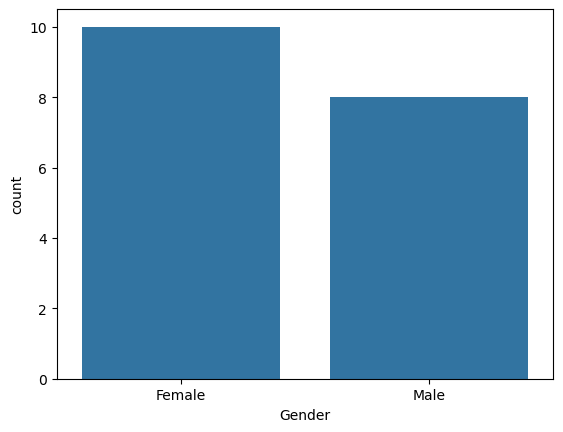

In [93]:
# Q.64: Count athletes based on Gender using count plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Athletes = pd.read_excel('V02Max_Combined.xlsx','Athletes')

# count plot on single categorical variable
sns.countplot(x ='Gender', data = Athletes)
 
# Show the plot
plt.show()